<a href="https://colab.research.google.com/github/kashishthakur26/Tensorflow-learning/blob/main/neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow
In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification 
* Multiclass classification
* Multilabel classification

In [8]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state =42)

In [9]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [11]:
import pandas as pd 
circles = pd.DataFrame({"X0":x[:,0], "X1": x[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


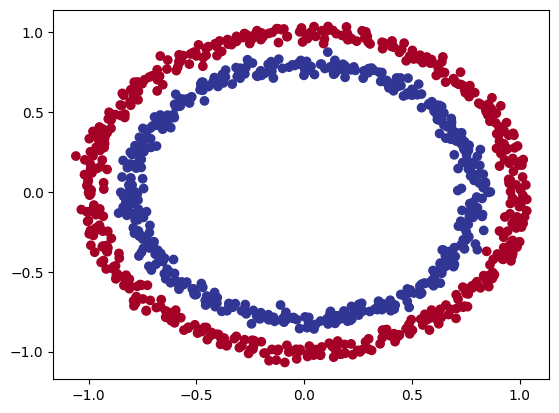

In [12]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1] , c=y , cmap=plt.cm.RdYlBu)

In [13]:
x.shape , y.shape

((1000, 2), (1000,))

## steps in modelling
The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model 
4. Evaluate the model
5. Tweak
6. Evaluate

In [14]:
import tensorflow as tf

In [15]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model1.fit(x,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 5.3668 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 964us/step - loss: 5.4717 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 959us/step - loss: 4.2954 - accuracy: 0.5020
Epoch 4/5
32/32 [==============================] - 0s 965us/step - loss: 1.8426 - accuracy: 0.4610
Epoch 5/5
32/32 [==============================] - 0s 968us/step - loss: 0.7154 - accuracy: 0.4750


In [16]:
model1.fit(x,y, epochs = 200 , verbose=0)

since we're working on a binary clasification problemn and our model is getting around ~50% accuracy.... it's performing as its guessing.

So let's step things up a notch and add an extra layer.

In [17]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model2.fit(x , y , epochs=100, verbose=0)


In [18]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 923us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932621002197266, 0.5]

## Improving the model


In [19]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Imporving our model
Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [20]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model3.fit(x , y,epochs=100 , verbose=0)



In [21]:
model3.evaluate(x ,y)

32/32 [==============================] - 0s 963us/step - loss: 0.7025 - accuracy: 0.5090


[0.7024986743927002, 0.5090000033378601]

from numpy.lib.function_base import meshgrid
To visualize our model's predictions, let's create a function 'plot_decision_boundary()', this function will:

* Take in a trained model, feature (x) and labels (y).
* Create a meshgrid of the different x values.
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def plot_decision_boundary(model , x ,y):
  x_min , x_max = x[:, 0].min() - 0.1 , x[:, 0].max() + 0.1
  y_min , y_max = x[:, 1].min() - 0.1 , x[:,1].max() + 0.1
  xx ,yy = np.meshgrid(np.linspace(x_min , x_max ,100),
                       np.linspace(y_min,y_max , 100))
  
  x_in = np.c_[xx.ravel() , yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classifcation")
    y_pred =  np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary clasification")
    y_pred =  np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx , yy ,y_pred , cmap= plt.cm.RdYlBu , alpha=0.7)
  plt.scatter(x[:, 0], x[:,1] , c=y , s=40 , cmap=plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())




313/313 [==============================] - 0s 771us/step
doing binary clasification


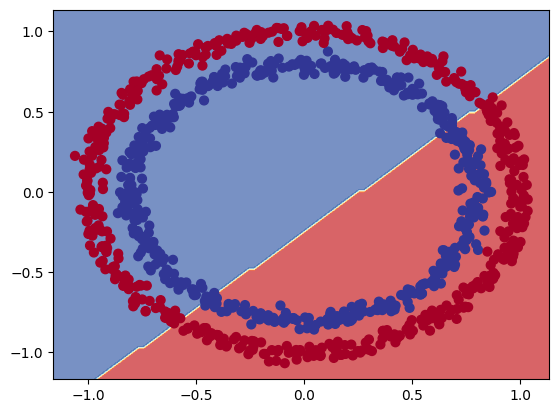

In [24]:
plot_decision_boundary(model3, x, y)

In [25]:
# # Set random seed
# tf.random.set_seed(42)

# # 1. Create the model (this time 3 layers)
# model_3 = tf.keras.Sequential([
#   # Before TensorFlow 2.7.0
#   # tf.keras.layers.Dense(100), # add 100 dense neurons

#   # With TensorFlow 2.7.0
#   # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

#   ## After TensorFlow 2.8.0 ##
#   tf.keras.layers.Dense(100), # add 100 dense neurons
#   tf.keras.layers.Dense(10), # add another layer with 10 neurons
#   tf.keras.layers.Dense(1)
# ])

# # 2. Compile the model
# model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
#                 metrics=['accuracy'])

# # 3. Fit the model
# model_3.fit(x, y, epochs=100, verbose=1) # fit for 100 passes of the data

313/313 [==============================] - 0s 763us/step
doing binary clasification


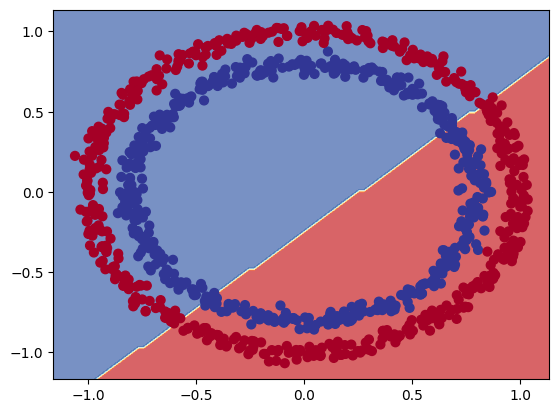

In [26]:
plot_decision_boundary(model3, x, y)


  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

In [27]:
tf.random.set_seed(42)

x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train= y_regression[:150]
y_reg_test = y_regression[150:]

model3.fit(x_reg_train , y_reg_train , epochs=100)


Epoch 1/100


ValueError: ignored

In [28]:
tf.random.set_seed(42)

model_i = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_i.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_i.fit(tf.expand_dims(x_reg_train, axis=-1) , y_reg_train , epochs=100 , verbose=0)

In [29]:
y_reg_pred = model_i.predict(x_reg_train)
y_reg_pred.shape

5/5 [==============================] - 0s 2ms/step


(150, 1)

In [30]:
y_reg_preds = tf.constant(y_reg_pred.squeeze())

In [31]:

x_reg_train.shape, y_reg_train.shape



(TensorShape([150]), TensorShape([150]))

ValueError: ignored

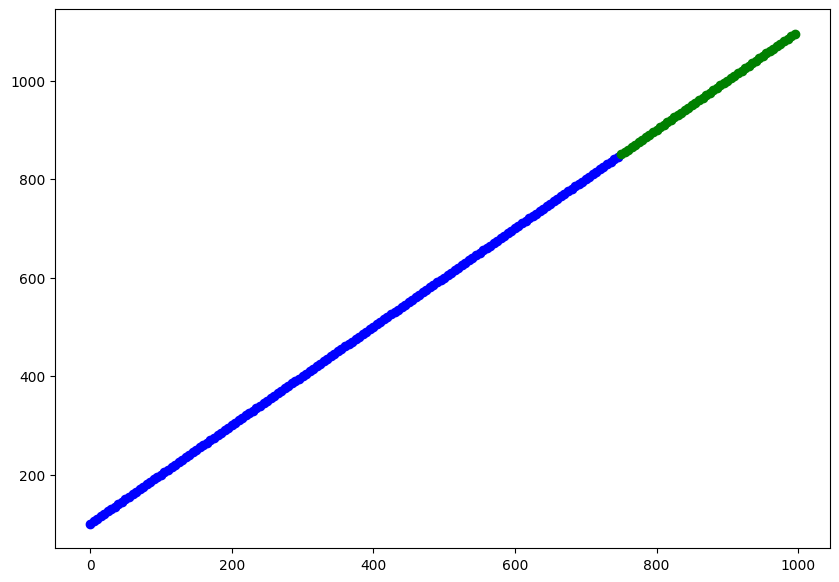

In [32]:


# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(x_reg_test, y_reg_preds , c="r" , label="predictions")

In [33]:
## Non - linearity

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation= "linear")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(x , y , epochs=100 , verbose=0)

313/313 [==============================] - 0s 721us/step
doing binary clasification


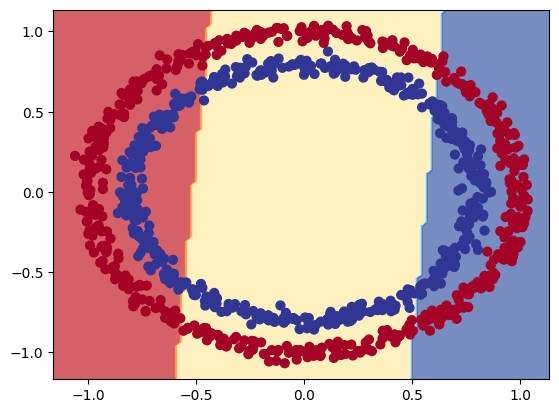

In [34]:
plot_decision_boundary(model_4 , x ,y)

In [35]:
import tensorflow as tf

In [36]:
# neural network with non-linear activation fucntion

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics="accuracy")

history = model_6.fit(x , y ,epochs=100 , verbose=0)

313/313 [==============================] - 0s 960us/step
doing multiclass classifcation


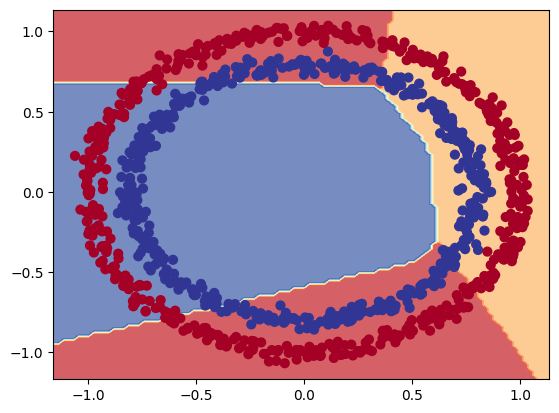

In [37]:
plot_decision_boundary(model_6,x , y)

In [38]:
import numpy as np

def plot_decision_boundary1(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 791us/step
doing multiclass classification...


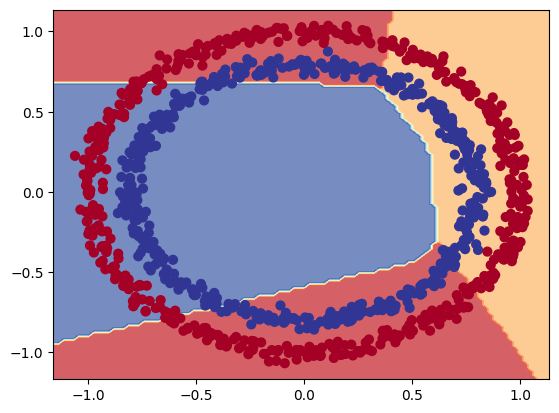

In [39]:
plot_decision_boundary1(model_6 , x ,y)

In [40]:
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(x, y, epochs=250, verbose=0)

In [41]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 889us/step - loss: 0.0378 - accuracy: 0.9980


[0.037791378796100616, 0.9980000257492065]

313/313 [==============================] - 0s 749us/step
doing binary classifcation...


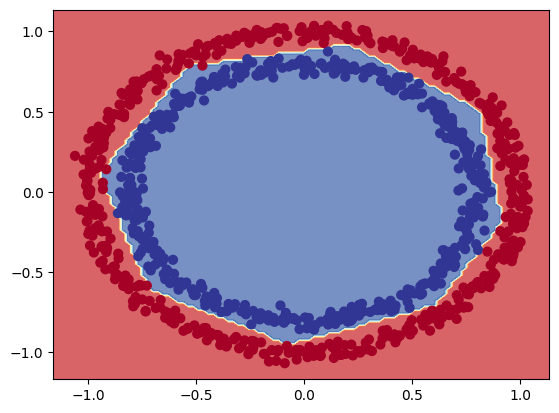

In [42]:
plot_decision_boundary1(model_7 , x ,y)

In [43]:
len(x)

1000

In [44]:
x_train , y_train = x[:800] , y[:800]
x_test , y_test = x[800:] , y[800:]

In [46]:
len(x_test)

200

In [47]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_8.fit(x_train , y_train , epochs=25 , verbose=0)

In [48]:
model_8.evaluate(x_test , y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5150


[0.6879163384437561, 0.5149999856948853]

313/313 [==============================] - 0s 728us/step
doing binary classifcation...
313/313 [==============================] - 0s 810us/step
doing binary classifcation...


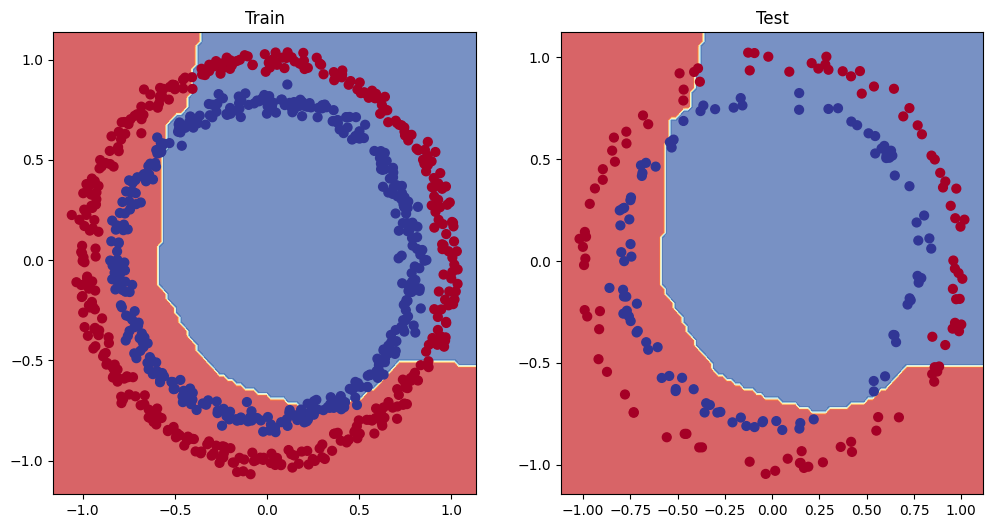

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1 , 2 , 1)
plt.title("Train")
plot_decision_boundary1(model_8 , X=x_train , y= y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary1(model_8 , X=x_test , y=y_test)

## Plot the loss (or training) curves

In [50]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690796,0.49750
1,0.689591,0.51250
2,0.688526,0.52125
3,0.687590,0.51625
4,0.686654,0.52750
5,0.685941,0.52625
6,0.684930,0.52500
7,0.684367,0.52875
8,0.683653,0.57500
9,0.682968,0.57250


Text(0.5, 1.0, 'Model_8 loss curves')

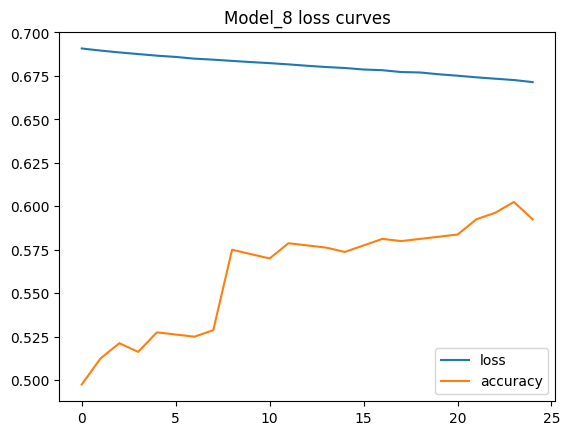

In [51]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

In [52]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

history9 = model_9.fit(x_train , y_train,
                       epochs=100,
                       callbacks=[lr_scheduler] , verbose=0)

<Axes: xlabel='epochs'>

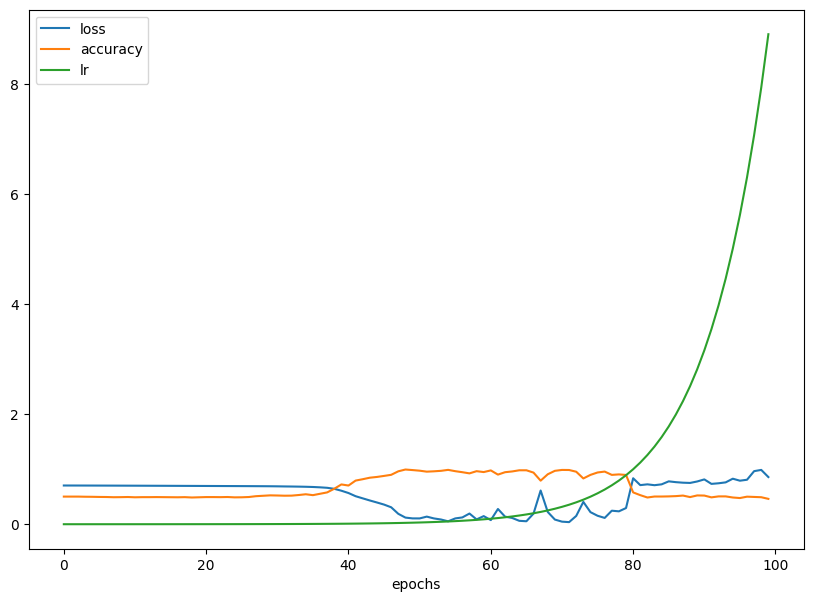

In [53]:
pd.DataFrame(history9.history).plot(figsize=(10,7) , xlabel="epochs")

In [54]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics="accuracy")

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

history9 = model_10.fit(x_train , y_train,
                       epochs=20,
                       callbacks=[lr_scheduler] , verbose=0)

In [55]:
model_9.evaluate(x_test , y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6934380531311035, 0.4950000047683716]

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of the other classification evaluation methods and metrics you should ba familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [56]:
loss , accuracy = model_9.evaluate(x_test , y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4950
Model loss on the test set: 0.6934380531311035
Model accuracy on the test set: 49.50000047683716%


In [58]:
from sklearn.metrics import confusion_matrix

In [71]:
 y_preds = model_7.predict(x_test)
confusion_matrix(y_test , tf.round(y_preds))

7/7 [==============================] - 0s 1ms/step


array([[100,   1],
       [  0,  99]])

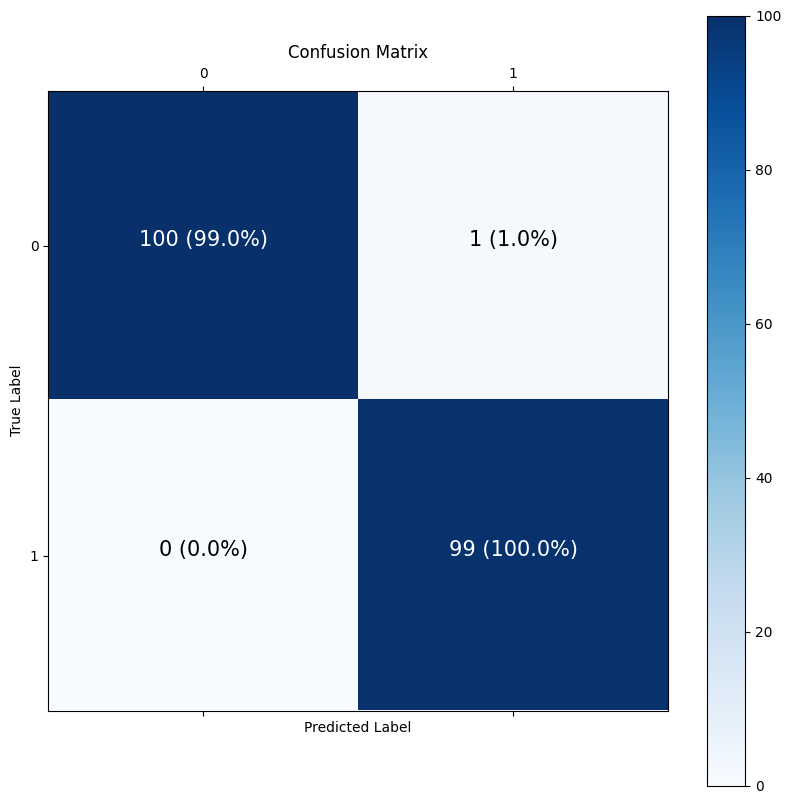

In [72]:
import itertools

figsize = (10,10)

cm=confusion_matrix(y_test , tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[: , np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax=ax.matshow(cm , cmap=plt.cm.Blues)
fig.colorbar(cax)
classes = False
if classes:
  labels = classes

else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max() + cm.min()) /2

for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
  plt.text(j , i , f"{cm[i ,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color = "white" if cm[i,j] > threshold else "black",
           size=15)




## Larger example (mutliclass classification)
when you have more than two classes as an option , it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

In [74]:
import tensorflow as tf


In [76]:
from tensorflow.keras.datasets import fashion_mnist
(train_data , train_labels ) , (test_data , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [78]:
train_data[0].shape

(28, 28)

In [80]:
train_labels[0].shape


()

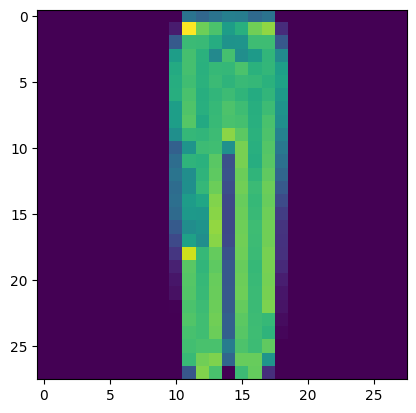

In [82]:
import matplotlib.pyplot as plt
plt.imshow(train_data[1000])

In [83]:
class_names = [ "T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal" , "Shirt" , "Sneaker", "Bag", "Ankle boot"]

In [84]:
len(class_names)

10

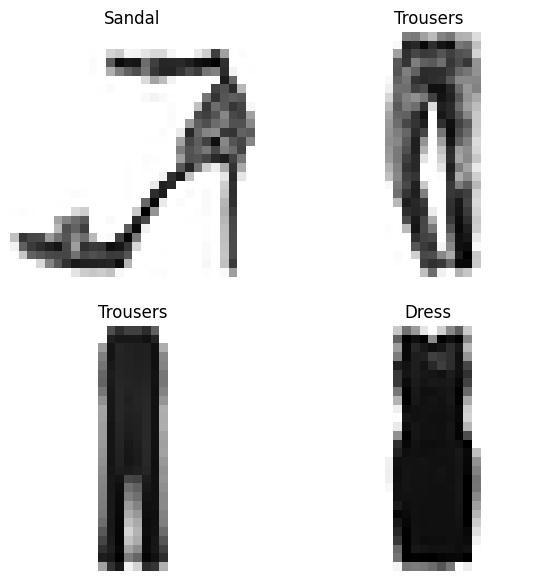

In [85]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2 ,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



## Building a multi-class classification model
for pur mutli-class classifcation model , we can use a similar architecture to our binary classifiers , however, we're going to have to tweak a few things:
  * Input shape = 28 X 28(the shape of one image)
  * output shape = 10 (one per class clothing)
  * Loss function = tf.keras.losses.CategoricalCrossentropy()
  * Output layer activation  =Softmax(not sigmoid)

In [86]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [89]:
tf.random.set_seed(42)


model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])


model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels , depth=10),
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4059 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy:

In [90]:
train_data.min(), train_data.max()

(0, 255)

In [91]:
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [92]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1313 - accuracy: 0.5713 - val_loss: 0.7502 - val_accuracy: 0.7182
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6722 - accuracy: 0.7531 - val_loss: 0.6654 - val_accuracy: 0.7585
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6188 - accuracy: 0.7743 - val_loss: 0.6473 - val_accuracy: 0.7595
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5973 - accuracy: 0.7819 - val_loss: 0.6151 - val_accuracy: 0.7768
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5752 - accuracy: 0.7875 - val_loss: 0.6056 - val_accuracy: 0.7724
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5583 - accuracy: 0.7929 - val_loss: 0.5921 - val_accuracy: 0.7816
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5478 - accuracy: 0.7946 - val_loss: 0.6150 - val_accuracy:

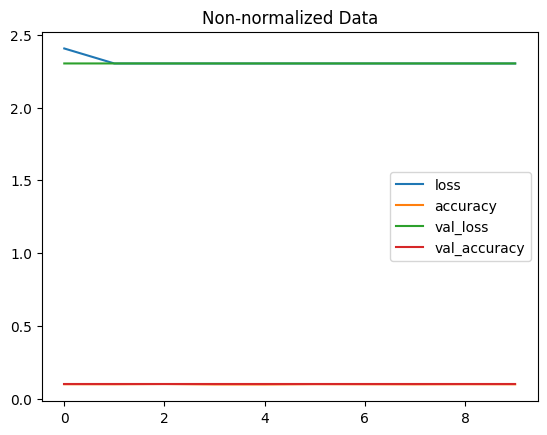

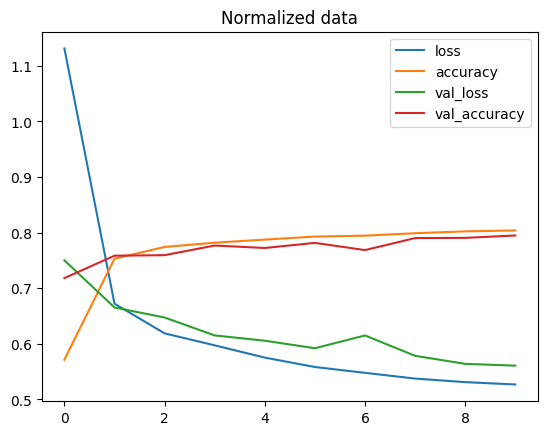

In [94]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [100]:
## Finding idela learning rate
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28 ,28)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data , test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3352 - accuracy: 0.4761 - val_loss: 0.8461 - val_accuracy: 0.6901 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7009 - accuracy: 0.7597 - val_loss: 0.6603 - val_accuracy: 0.7742 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6036 - accuracy: 0.7932 - val_loss: 0.6423 - val_accuracy: 0.7784 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5726 - accuracy: 0.8041 - val_loss: 0.5965 - val_accuracy: 0.8020 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5558 - accuracy: 0.8085 - val_loss: 0.5935 - val_accuracy: 0.7983 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5429 - accuracy: 0.8128 - val_loss: 0.6209 - val_accuracy: 0.7858 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the learning Rate ')

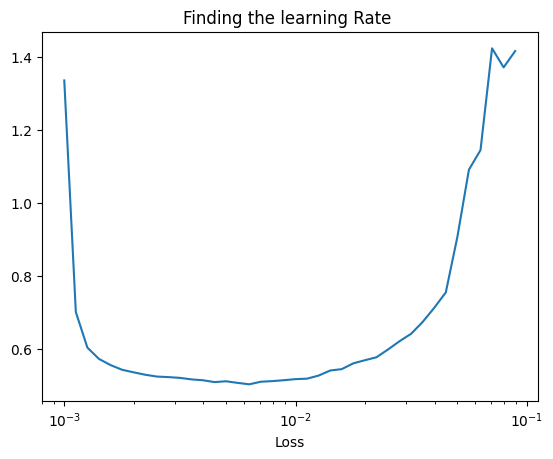

In [102]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs , find_lr_history.history["loss"])
plt.xlabel("Loss")
plt.title("Finding the learning Rate ")


In [104]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28 ,28)),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

find_lr_history = model_14.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data , test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2450 - accuracy: 0.5208 - val_loss: 0.9662 - val_accuracy: 0.6332 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8575 - accuracy: 0.6831 - val_loss: 0.7945 - val_accuracy: 0.7006 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7554 - accuracy: 0.7116 - val_loss: 0.7520 - val_accuracy: 0.7075 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7258 - accuracy: 0.7161 - val_loss: 0.7345 - val_accuracy: 0.7093 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7094 - accuracy: 0.7190 - val_loss: 0.7175 - val_accuracy: 0.7144 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6743 - accuracy: 0.7448 - val_loss: 0.6732 - val_accuracy: 0.7518 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 3s

In [105]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [106]:
y_probs = model_14.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [107]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [108]:
y_preds = y_probs.argmax(axis=1)

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[693,   7,  30,  53,  16,   1, 186,   0,  14,   0],
       [  1, 949,  18,  28,   2,   0,   1,   0,   1,   0],
       [ 13,   1, 724,   7, 207,   0,  45,   0,   3,   0],
       [ 36,  38,  26, 750,  94,   0,  53,   2,   1,   0],
       [  1,   1, 116,  18, 828,   0,  33,   0,   3,   0],
       [  0,   0,   0,   3,   2, 851,   0,  76,  11,  57],
       [107,   2, 115,  29, 230,   0, 504,   0,  13,   0],
       [  0,   0,   0,   2,   0,  22,   0, 939,   1,  36],
       [  1,   0,   5,   4,  16,  18,  44,   6, 906,   0],
       [  0,   1,   0,   1,   0,   6,   0,  53,   4, 935]])

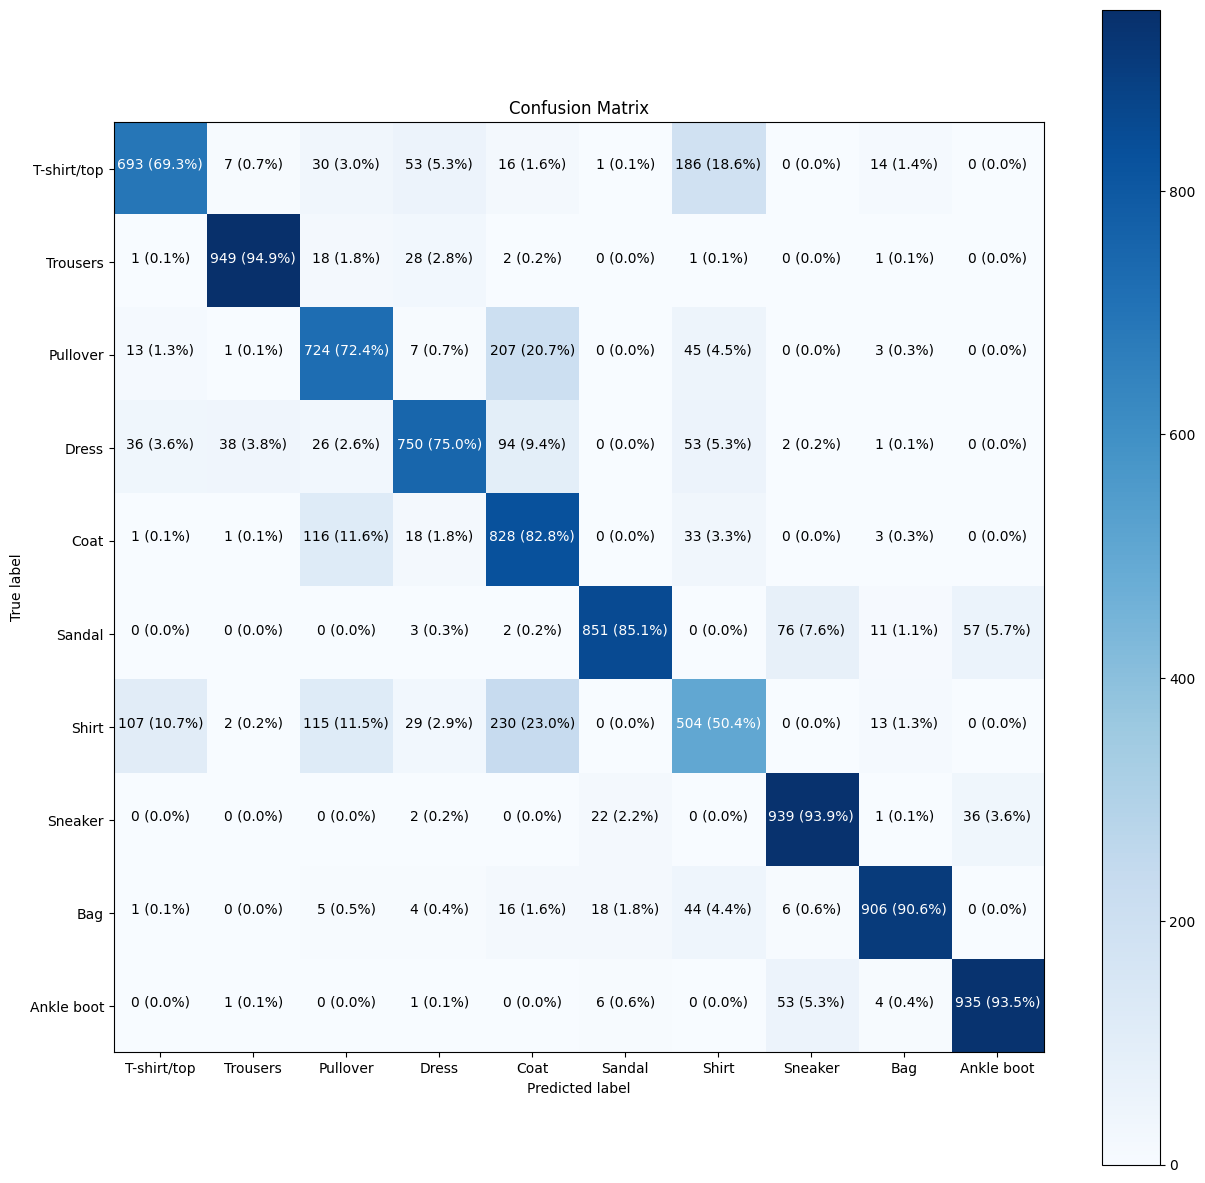

In [110]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [111]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 48ms/step


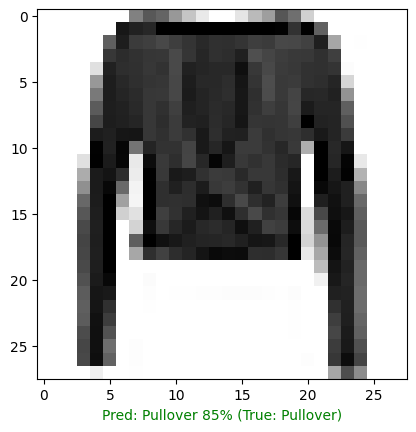

In [112]:
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [113]:
model_14.layers

In [114]:
model_14.layers[1]